In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [29]:
# write your code for task 0 here
df = pd.DataFrame(pd.read_csv("../data/adult.csv", na_values="?"))
df = df.dropna()
lte_50 = df.loc[(df["salary"] == ">50K") & (df["salary K$"] <= 50)]
gt_50 = df.loc[(df["salary"] == "<=50K") & (df["salary K$"] > 50)]

# Task 1
Print the count of men and women in the dataset.

In [31]:
gender_count = df["sex"].value_counts()
print(gender_count)

Male      20380
Female     9782
Name: sex, dtype: int64


# Task 2
Find the average age of men in dataset

In [35]:
df[df["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [50]:
polish_count = df[df["native-country"] == "Poland"].shape[0]
polish_percent = polish_count * 100 / df.shape[0]
polish_percent

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [57]:
people_gt_50k_age_mean = df[df["salary"] == ">50K"]["age"].mean()
people_gt_50k_age_std = df[df["salary"] == ">50K"]["age"].std()
print(people_gt_50k_age_mean)
print(people_gt_50k_age_std)

43.95911028236548
10.269632835673852


In [59]:
people_lte_50k_age_mean = df[df["salary"] == "<=50K"]["age"].mean()
people_lte_50k_age_std = df[df["salary"] == "<=50K"]["age"].std()
print(people_lte_50k_age_mean)
print(people_lte_50k_age_std)

36.60806038668668
13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [71]:
exclude_edu_list = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
df[~df["education"].isin(exclude_edu_list) & (df["salary"] == ">50K")]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [72]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [96]:
men_df = df[df["sex"] == "Male"]
married_salary = men_df[men_df["marital-status"].str.startswith("Married")].groupby("salary").count()
no_married_salary = men_df[~men_df["marital-status"].str.startswith("Married")].groupby("salary").count()

data = {
    "married_status": [True, False],
    ">50K": [married_salary.loc[">50K"][0], no_married_salary.loc[">50K"][0]],
    "<=50K": [married_salary.loc["<=50K"][0], no_married_salary.loc["<=50K"][0]]
}
salary_comparing = pd.DataFrame(data)

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [108]:
max_hours_per_week = df["hours-per-week"].max()
number_people_with_max_hours = df[df["hours-per-week"] == max_hours_per_week].count()[0]
number_people_with_max_hours

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [113]:
df["is_married"] = df["marital-status"].str.startswith("Married")

In [114]:
high_edu_list = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
df['has_high_edu'] = df["education"].isin(high_edu_list)

In [115]:
df

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$,is_married,has_high_edu
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39,False,True
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35,True,True
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27,False,False
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43,True,False
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36,True,True
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173,True,False
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40,False,False
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38,False,False


In [132]:

race_dummies = pd.get_dummies(df["race"])
df = pd.concat([df, race_dummies], axis=1)

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,...,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,...,0,0,0,0,1,0,0,0,0,1
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,...,0,0,0,0,1,0,0,0,0,1
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,...,0,0,0,0,1,0,0,0,0,1
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,...,0,0,1,0,0,0,0,1,0,0
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,...,0,0,0,0,1,0,0,0,0,1
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,...,0,0,0,0,1,0,0,0,0,1
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,...,0,0,0,0,1,0,0,0,0,1
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,...,0,0,0,0,1,0,0,0,0,1


In [133]:
work_class_dummies = pd.get_dummies(df["workclass"])
df = pd.concat([df, work_class_dummies], axis=1)

In [134]:
occupation_dummies = pd.get_dummies(df["occupation"])
df = pd.concat([df, occupation_dummies], axis=1)

In [135]:
sex_dummies = pd.get_dummies(df["sex"])
df = pd.concat([df, sex_dummies], axis=1)

In [137]:
country_dummies = pd.get_dummies(df["native-country"])
df = pd.concat([df, country_dummies], axis=1)

In [141]:
df_for_correlation = df.drop(["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "Unnamed: 0"], axis=1)

In [142]:
df_for_correlation

,age,hours-per-week,salary,salary K$,is_married,has_high_edu,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,40,<=50K,39,False,True,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,<=50K,35,True,True,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,40,<=50K,27,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,40,<=50K,43,True,False,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,40,<=50K,25,True,True,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,<=50K,36,True,True,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,40,>50K,173,True,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,40,<=50K,40,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,20,<=50K,38,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [143]:
df_for_correlation.corr()

,age,hours-per-week,salary K$,is_married,has_high_edu,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
age,1.000000,0.101599,0.208203,0.310553,0.078760,-0.012665,-0.007020,-0.014101,-0.032347,0.026906,...,0.001062,0.007836,0.000024,0.001923,-0.007879,-0.004940,0.007868,0.016259,-0.017775,0.000657
hours-per-week,0.101599,1.000000,0.196378,0.221492,0.138793,-0.004122,-0.006287,-0.060463,-0.006004,0.056404,...,0.003162,-0.012015,0.000689,0.014328,-0.000305,0.012846,-0.007566,0.010673,-0.010381,0.006983
salary K$,0.208203,0.196378,1.000000,0.375202,0.254759,-0.026346,0.011248,-0.074815,-0.028320,0.071669,...,-0.009710,-0.016483,-0.001498,-0.006514,0.016939,-0.000891,-0.003442,0.034000,-0.014737,0.008560
is_married,0.310553,0.221492,0.375202,1.000000,0.091111,-0.013746,0.018009,-0.120679,-0.003588,0.097076,...,0.005349,-0.003585,-0.000946,0.005439,0.012227,-0.000413,0.001014,-0.030453,-0.006741,0.012484
has_high_edu,0.078760,0.138793,0.254759,0.091111,1.000000,-0.030525,0.067465,-0.076402,-0.023359,0.045445,...,-0.010863,-0.022105,-0.002261,0.015572,0.042050,0.007194,-0.011303,0.011380,-0.006157,0.005356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thailand,-0.004940,0.012846,-0.000891,-0.000413,0.007194,-0.002323,0.119333,-0.007622,-0.002086,-0.050760,...,-0.000798,-0.001430,-0.000454,-0.001154,-0.000887,1.000000,-0.000580,-0.076390,-0.001095,-0.000547
Trinadad&Tobago,0.007868,-0.007566,-0.003442,0.001014,-0.011303,-0.002391,0.011728,0.062138,0.013426,-0.060512,...,-0.000821,-0.001472,-0.000467,-0.001187,-0.000913,-0.000580,1.000000,-0.078606,-0.001127,-0.000563
United-States,0.016259,0.010673,0.034000,-0.030453,0.011380,0.012314,-0.374358,0.024215,-0.130997,0.192115,...,-0.108062,-0.193727,-0.061442,-0.156254,-0.120121,-0.076390,-0.078606,1.000000,-0.148334,-0.074108
Vietnam,-0.017775,-0.010381,-0.014737,-0.006741,-0.006157,-0.004512,0.255201,-0.014800,-0.004051,-0.110040,...,-0.001549,-0.002777,-0.000881,-0.002240,-0.001722,-0.001095,-0.001127,-0.148334,1.000000,-0.001062


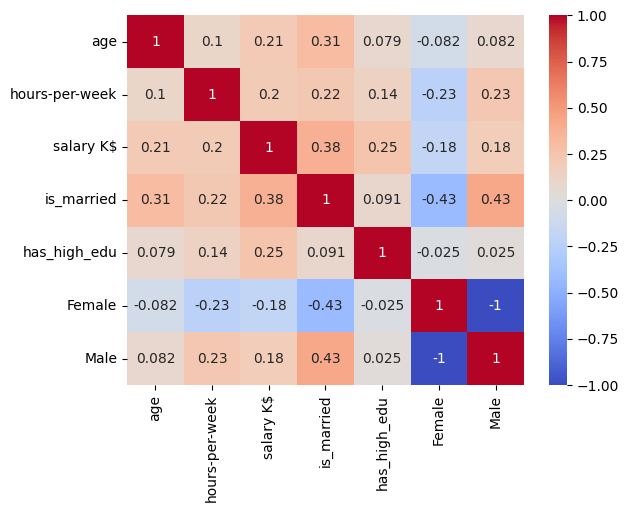

In [156]:
seaborn_sample = df_for_correlation.drop(df_for_correlation.columns.difference(["age",
 "hours-per-week", "salary", "salary K$", "is_married", "has_high_edu", "Male", "Female"]), axis=1)

sns.heatmap(seaborn_sample.corr(), cmap='coolwarm', annot=True)
plt.show()